In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import glob,os

In [2]:
color_scheme={'SDSS':'#2ca02c','NIHAO NoAGN':'#1f77b4','NIHAO AGN':'#ff7f0e','NIHAO n80':'#7f7f7f','NIHAO UHD':'#d62728'}

In [14]:
#df_SDSS=pd.read_csv('statmorph_SDSS_i.csv')
#df_AGN=pd.read_csv('statmorph_AGN_i.csv')
#df_noAGN=pd.read_csv('statmorph_noAGN_i.csv')

df_SDSS=pd.read_csv('statmorph_SDSS_i.csv')
df_SDSS=df_SDSS[df_SDSS['flag']==0]

df_AGN=pd.read_csv('statmorph_AGN_i.csv')
df_AGN=df_AGN[df_AGN['flag']!=4]
df_AGN=df_AGN[df_AGN['gini']>=0]

df_noAGN=pd.read_csv('statmorph_noAGN_i.csv')
df_noAGN=df_noAGN[df_noAGN['flag']!=4]

In [15]:
df_AGN

,name,flag,flag_sersic,xc_centroid,yc_centroid,ellipticity_centroid,elongation_centroid,orientation_centroid,xc_asymmetry,yc_asymmetry,...,sky_median,sky_sigma,xmin_stamp,ymin_stamp,xmax_stamp,ymax_stamp,nx_stamp,ny_stamp,m,score
0,AGN_g2.71e12_14.png,2.0,0.0,250.950326,246.319256,0.238497,1.313192,-0.620655,250.250000,245.758333,...,-30.310730,12.940044,0.0,0.0,499.0,499.0,500.0,500.0,3.787330e+10,0.012345
1,AGN_g2.20e13_08.png,2.0,0.0,248.782642,248.409884,0.225906,1.291832,-0.229048,244.253928,249.248037,...,-38.028430,21.626345,0.0,0.0,499.0,499.0,500.0,500.0,2.911565e+11,0.007418
2,AGN_g4.84e12_00.png,2.0,0.0,249.442187,244.998496,0.411368,1.698854,-1.028511,244.755290,249.745851,...,-40.964222,13.690717,0.0,0.0,499.0,499.0,500.0,500.0,9.299939e+10,0.050495
3,AGN_g1.44e13_15.png,0.0,0.0,249.144754,250.632596,0.168337,1.202411,-0.382879,248.750000,250.744681,...,-16.179818,10.090225,0.0,0.0,499.0,499.0,500.0,500.0,7.481271e+11,0.005018
4,AGN_g5.55e11_01.png,2.0,0.0,249.520147,240.097555,0.340133,1.515456,1.219396,251.250001,244.249999,...,-7.727753,2.774867,0.0,0.0,499.0,499.0,500.0,500.0,1.546872e+10,0.019692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,AGN_g2.02e13_14.png,0.0,0.0,250.575711,250.965143,0.269218,1.368398,1.339756,250.251929,240.240551,...,-25.361119,18.883982,0.0,0.0,499.0,499.0,500.0,500.0,4.243027e+11,0.023311
1536,AGN_g3.49e11_10.png,1.0,0.0,90.027831,20.910230,0.508963,2.036506,0.339482,88.250000,17.256096,...,-3.565935,8.899429,0.0,0.0,189.0,120.0,190.0,121.0,3.928584e+09,0.093805
1537,AGN_g7.44e11_13.png,2.0,0.0,245.099578,254.970355,0.293574,1.415576,-1.349696,251.750001,257.749999,...,-34.733620,13.544842,0.0,0.0,499.0,499.0,500.0,500.0,1.167212e+10,0.091330
1538,AGN_g1.12e12_06.png,0.0,0.0,251.452437,247.536231,0.259152,1.349804,0.276423,249.758429,248.743551,...,-7.801791,8.305072,0.0,0.0,499.0,499.0,500.0,500.0,2.709797e+10,0.002944


In [43]:
# write a function, given x and y, divide x into bins and calculate the median and 16th to 84th percentile range of y in each bin, and then plot the median and percentile range as shaded region
def plot_median_percentile(x,y,nbin=10,*args,**kwargs):
    x=np.array(x)
    y=np.array(y)
    xbin=np.linspace(x.min(),x.max(),nbin+1)
    xbin_center=(xbin[1:]+xbin[:-1])/2
    y_median=np.zeros(nbin)
    y_16th=np.zeros(nbin)
    y_84th=np.zeros(nbin)
    for i in range(nbin):
        y_median[i]=np.median(y[(x>=xbin[i])&(x<xbin[i+1])])
        y_16th[i]=np.percentile(y[(x>=xbin[i])&(x<xbin[i+1])],16)
        y_84th[i]=np.percentile(y[(x>=xbin[i])&(x<xbin[i+1])],84)
    plt.plot(xbin_center,y_median,'o',*args,**kwargs)
    plt.fill_between(xbin_center,y_16th,y_84th,alpha=0.3)

# write a function, given x, y and score, divide x into bins and calculate the median and 16th to 84th percentile range of y in each bin, as well as mean of score in each bin,
# and then plot the median and percentile range of y as shaded region, and color the points according to the mean of score
def plot_median_percentile_color(x,y,score,nbin=10,*args,**kwargs):
    x=np.array(x)
    y=np.array(y)
    score=np.array(score)
    xbin=np.linspace(x.min(),x.max(),nbin+1)
    xbin_center=(xbin[1:]+xbin[:-1])/2
    y_median=np.zeros(nbin)
    y_16th=np.zeros(nbin)
    y_84th=np.zeros(nbin)
    score_mean=np.zeros(nbin)
    for i in range(nbin):
        y_median[i]=np.median(y[(x>=xbin[i])&(x<xbin[i+1])])
        y_16th[i]=np.percentile(y[(x>=xbin[i])&(x<xbin[i+1])],16)
        y_84th[i]=np.percentile(y[(x>=xbin[i])&(x<xbin[i+1])],84)
        score_mean[i]=np.mean(score[(x>=xbin[i])&(x<xbin[i+1])])
        
    #print(xbin_center,y_median,y_16th,y_84th,score_mean)
    plt.scatter(xbin_center,y_median,c=np.log10(score_mean),cmap='magma',s=50,*args,**kwargs)
    plt.fill_between(xbin_center,y_16th,y_84th,alpha=0.3)


# make a function to plot the above three plots, for any statistic
def plot_statistic(statistic):
    plot_median_percentile(np.log10(df_SDSS['m']),df_SDSS[statistic],label='SDSS')
    plot_median_percentile_color(np.log10(df_AGN['m']),df_AGN[statistic],df_AGN['score'],label='AGN',marker='s')
    plot_median_percentile_color(np.log10(df_noAGN['m']),df_noAGN[statistic],df_noAGN['score'],label='noAGN',marker='^')
    plt.colorbar()
    plt.xlabel('log10(mass)')
    plt.ylabel(statistic)
    plt.legend ()

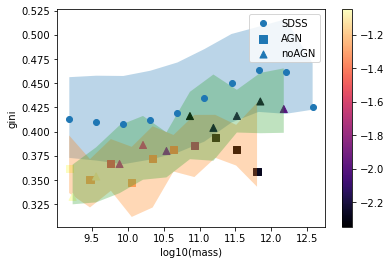

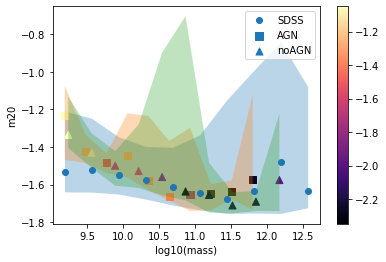

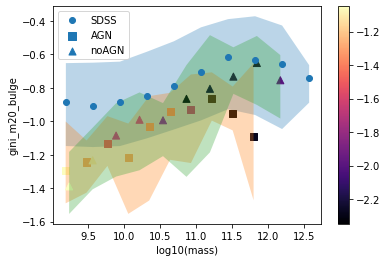

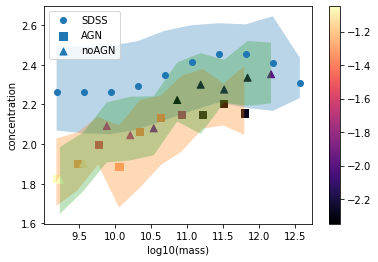

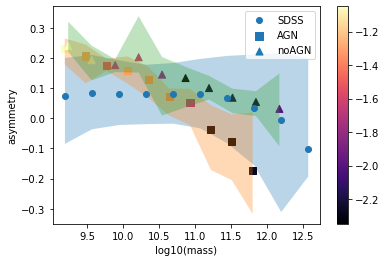

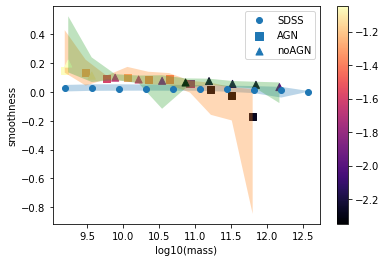

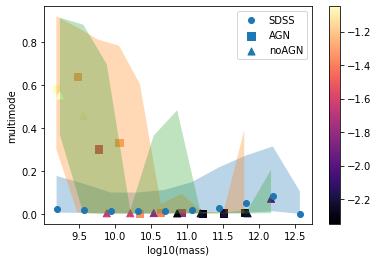

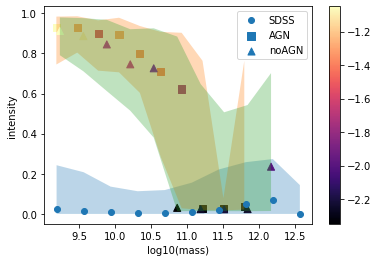

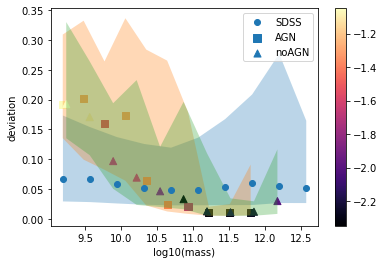

In [44]:
statstics = ['gini','m20','gini_m20_bulge','concentration','asymmetry','smoothness','multimode','intensity', 'deviation']
for statistic in statstics:
    plot_statistic(statistic)
    plt.show()

In [47]:
df_AGN[['score','gini','m20','gini_m20_bulge','concentration','asymmetry','smoothness','multimode','intensity', 'deviation']].corr()

,score,gini,m20,gini_m20_bulge,concentration,asymmetry,smoothness,multimode,intensity,deviation
score,1.000000,-0.479315,0.465753,-0.588060,-0.560111,0.240249,0.020260,0.496790,0.444219,0.529079
gini,-0.479315,1.000000,-0.284588,0.854183,0.651885,-0.109874,-0.085238,-0.236608,-0.245709,-0.324070
m20,0.465753,-0.284588,1.000000,-0.741563,-0.559630,0.018996,-0.128929,0.600367,0.363558,0.631875
gini_m20_bulge,-0.588060,0.854183,-0.741563,1.000000,0.759747,-0.087195,0.010280,-0.491223,-0.369147,-0.569521
concentration,-0.560111,0.651885,-0.559630,0.759747,1.000000,-0.317720,0.012514,-0.439502,-0.425104,-0.579521
asymmetry,0.240249,-0.109874,0.018996,-0.087195,-0.317720,1.000000,0.050957,0.249087,0.573060,0.381487
smoothness,0.020260,-0.085238,-0.128929,0.010280,0.012514,0.050957,1.000000,-0.060116,0.019727,0.004553
multimode,0.496790,-0.236608,0.600367,-0.491223,-0.439502,0.249087,-0.060116,1.000000,0.458898,0.604057
intensity,0.444219,-0.245709,0.363558,-0.369147,-0.425104,0.573060,0.019727,0.458898,1.000000,0.536424
deviation,0.529079,-0.324070,0.631875,-0.569521,-0.579521,0.381487,0.004553,0.604057,0.536424,1.000000
